
Model Evaluation Metrics:
Mean Absolute Error (MAE): 9.81
Mean Squared Error (MSE): 146.17
Root Mean Squared Error (RMSE): 12.09
R² Score: 0.8756
price 189.13492681254863


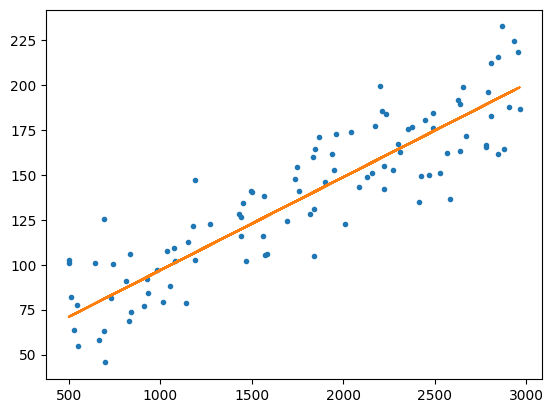

In [16]:
import matplotlib.pyplot as mp
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

def graph_plot(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    model=LinearRegression()
    model.fit(x_train,y_train)
    mp.plot(x,y,'.')
    mp.plot(x,model.predict(x))
    mp.show()


def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print("\nModel Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")


def preProcess_text(spec):      #maps input data text parameters to int

    
    if spec['location']==["Outskirts"]:
        spec['location']=[0]
    elif spec['location']==["Downtown"]:
        spec["location"]=[1]
    elif spec['location']==["Suburb"]:
        spec["location"]=[2]
    elif spec['location']==['Uptown']:
        spec["location"]=[3]
    elif spec['location']==["City Center"]:
        spec["location"]=[4]

    if spec["furnishing_status"]==["Unfurnished"]:
        spec["furnishing_status"]=[1]
    elif spec["furnishing_status"]==["Furnished"]:
        spec["furnishing_status"]=[0]
    elif spec["furnishing_status"]==["Semi-Furnished"]:
        spec["furnishing_status"]=[2]

    return spec

    

def Regression_model(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    evaluate_model(model,x_test,y_test)
    input_specs={                    # change this dictonary to predict for specific proprties
        "area":[2963],
        "bedrooms":[1],
        "bathrooms":[3],
        "location":["Uptown"],   
        "parking_space":[0], 
        "age_of_building":[6],
        "furnishing_status":["Furnished"]   
    }
    input_specs=preProcess_text(input_specs)

    input_df=pd.DataFrame(input_specs)
    pred=model.predict(input_df)
    print("price",pred[0])

def main():
    data=pd.read_csv('Data set for this project.csv')  # reading csv data
    data["location"]=data["location"].map({"Outskirts":0,"Downtown":1,"Suburb":2,"Uptown":3,"City Center":4,}) # mapping location text data to int 
    data['furnishing_status']=data['furnishing_status'].map({"Furnished":0,"Unfurnished":1,"Semi-Furnished":2}) # mapping furnishing status to int
                                                   

    x = data.drop("price", axis=1)    # define properties 
    y=data['price']

    Regression_model(x,y)

    graph_plot(data[['area']],y)    # graph plotting function (area vs price)
main()





